# Proyecto Sprint 8

## Descripción del proyecto

Se te ha ido muy bien en el curso TripleTen y te han ofrecido hacer prácticas en el departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Lo que tienes:

registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
un archivo con los pedidos en este periodo;
estadísticas de gastos de marketing.
Lo que vas a investigar:

cómo los clientes usan el servicio;
cuándo empiezan a comprar;
cuánto dinero aporta cada cliente a la compañía;
cuándo los ingresos cubren el costo de adquisición de los clientes.

## Análisis exploratorio de datos (Python)

In [1]:
# Importación de librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Preprocesamiento de los datos

In [2]:
# Descarga de los dataset

df_visits = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_log_us.csv", 
                       dtype = {"Device" : "category",
                              "Uid":"string"},
                       parse_dates = ["End Ts", "Start Ts"])

df_orders = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_log_us.csv",
                       dtype = {"Uid":"string"},
                       parse_dates = ["Buy Ts"])

df_costs = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/costs_us.csv",
                      parse_dates = ["dt"])

### df_visits

In [3]:
# Revisión de dataset visits

display(df_visits.head())
print()
print(df_visits.columns)
print()
print(df_visits.info())
print()
display(df_visits.describe())
print()
print("Filas duplicadas: ",df_visits.duplicated().sum())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  string        
dtypes: category(1), datetime64[ns](2), int64(1), string(1)
memory usage: 11.3 MB
None



,Source Id
count,359400.000000
mean,3.750515
std,1.917116
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,10.000000



Filas duplicadas:  0


In [4]:
# Correción de títulos
df_visits.columns = df_visits.columns.str.lower()
df_visits.columns = df_visits.columns.str.replace(" ","_")
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

In [5]:
df_visits["device"].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [7]:
df_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


Se cambian desde la importación del archivo los siguientes datos:
- Device --> Category
- End Ts --> to_datetime
- Start Ts --> to_datetime
- Uid --> string

Respecto a la información general de este df:
- No hay valores nulos
- No existen valores duplicados
- Los datos van desde el 01/06/2017 al 01/06/2018
- El 24/11/2017 aparentemente es el día con mayor frecuecia de visitas
- El source_id 4, aparentemente es el mas usado
- Aparentemente por "desktop" es el dispositivo por el cual se visita mas la aplicación

### df_orders

In [8]:
# Revisión de dataset orders

display(df_orders.head())
print()
print(df_orders.columns)
print()
print(df_orders.info())
print()
display(df_orders.describe())
print()
print("Filas duplicadas: ",df_orders.duplicated().sum())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(1)
memory usage: 1.2 MB
None



,Revenue
count,50415.000000
mean,4.999647
std,21.818359
min,0.000000
25%,1.220000
50%,2.500000
75%,4.890000
max,2633.280000



Filas duplicadas:  0


In [9]:
# Correción de títulos
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns = df_orders.columns.str.replace(" ","_")
df_orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [10]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(1)
memory usage: 1.2 MB


Se cambian desde la importación del archivo los siguientes datos:
- Buy Ts --> to_datetime
- Uid --> string

Respecto a la información general de este df:
- No hay valores nulos
- No existen valores duplicados
- El promedio de compras es de 5 con una alta desviación estandar, teniendo un mínimo de 0 y un máximo de 2633.

### df_costs

In [11]:
# Revisión de dataset costs

display(df_costs.head())
print()
print(df_costs.columns)
print()
print(df_costs.info())
print()
display(df_costs.describe())
print()
print("Filas duplicadas: ",df_costs.duplicated().sum())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



Index(['source_id', 'dt', 'costs'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None



,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000



Filas duplicadas:  0


In [12]:
df_costs["source_id"].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

Se cambian desde la importación del archivo los siguientes datos:
- dt --> to_datetime


Respecto a la información general de este df:
- No hay valores nulos
- No existen valores duplicados
- El promedio de costo es de 129 con una alta desviación estandar, teniendo un mínimo de 0.54 y un máximo de 1,788

## Haz informes y calcula métricas 

### Visitas

#### ¿Cuántas personas lo usan cada día, semana y mes?

##### ¿Cuántas personas lo usan cada día?

In [13]:
# Cálculo del promedio diario de visitas

df_visits['users_per_day'] = df_visits['start_ts'].dt.to_period('D')
users_per_day = df_visits.groupby("users_per_day").agg({"uid":"nunique"})
dau_total = users_per_day.mean()

print("La cantidad de usuarios promedio diarios es: ", round(dau_total.iloc[0]))

La cantidad de usuarios promedio diarios es:  908


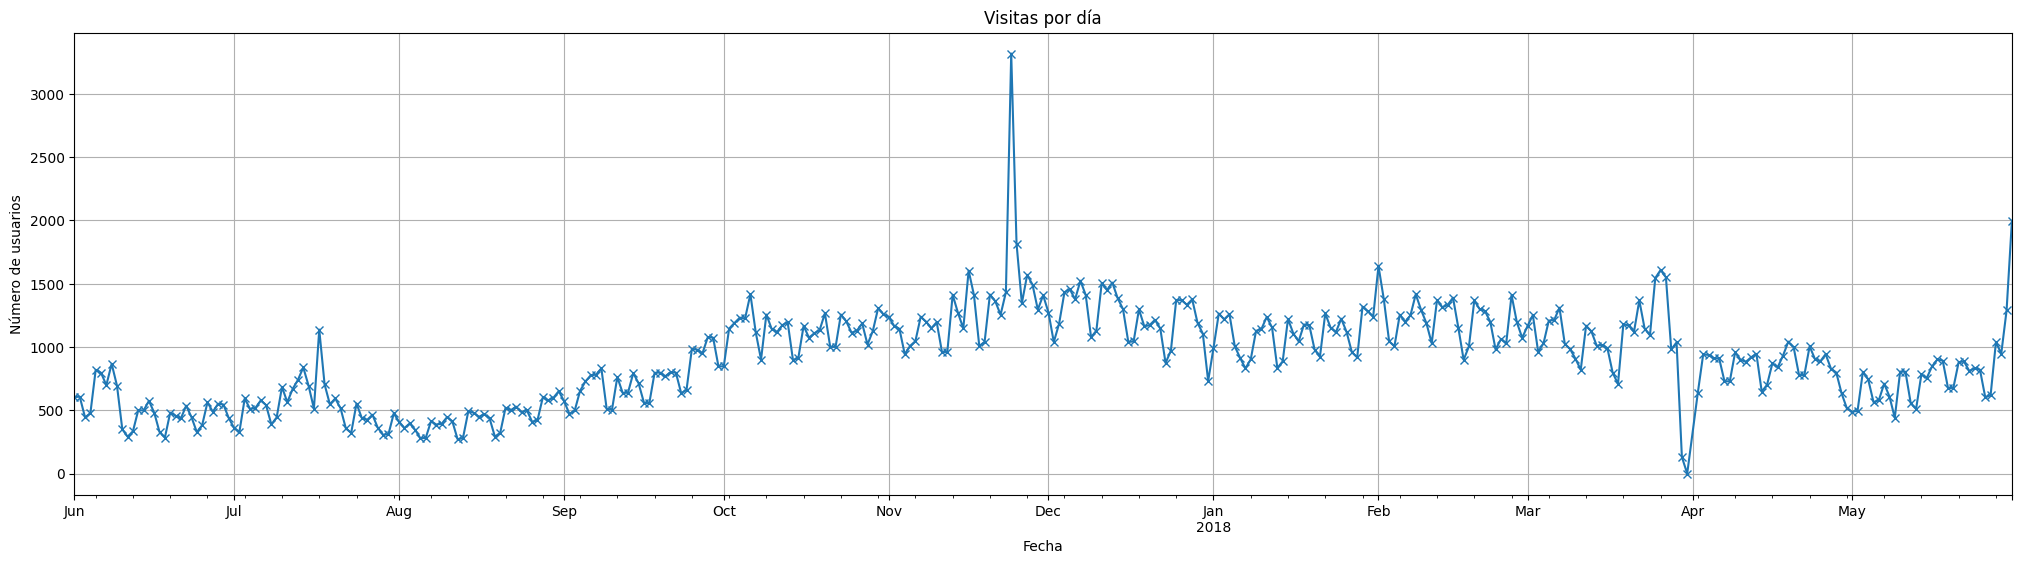

In [14]:
# Correción

# Comportamiento de visitas por día


users_per_day.plot(marker = "x",
                  title = "Visitas por día",
                  xlabel = "Fecha",
                  ylabel = "Número de usuarios",
                  legend = False,
                  grid = True,
                  figsize = [25,6])


plt.show()

Se observa un valor atípico por arriba de 3,000.
Buscaré ese dato

In [15]:
# Descripcipión del df

users_per_day.describe()

,uid
count,364.000000
mean,907.991758
std,370.513838
min,1.000000
25%,594.000000
50%,921.000000
75%,1173.000000
max,3319.000000


Parece ser que no existe un día del mes en específico en el que haya mas visitas, las visitas en los días del mes se ven con un comportamiento muy parecido.

Entiendo que son usuarios diarios y no visitas diarias, sin embargo, la pregunta que plantean en el proyecto es: **¿Cuántas personas lo usan cada día, semana y mes?** , por lo que desde mi punto de vista personas = usuarios.
Creo yo que si buscaran visitas, la pregunta tendría que ser **¿Cuántas visitas hay cad día, semana y mes?**

##### ¿Cuántas personas lo usan cada semana?

In [82]:
# Cálculo del promedio semanal de visitas

df_visits['users_per_week'] = df_visits['start_ts'].dt.to_period('W')
users_per_week = df_visits.groupby("users_per_week").agg({"uid":"nunique"})
wau_total = users_per_week.mean()

print("La cantidad de usuarios promedio diarios es: ", round(wau_total.iloc[0]))

La cantidad de usuarios promedio diarios es:  5716


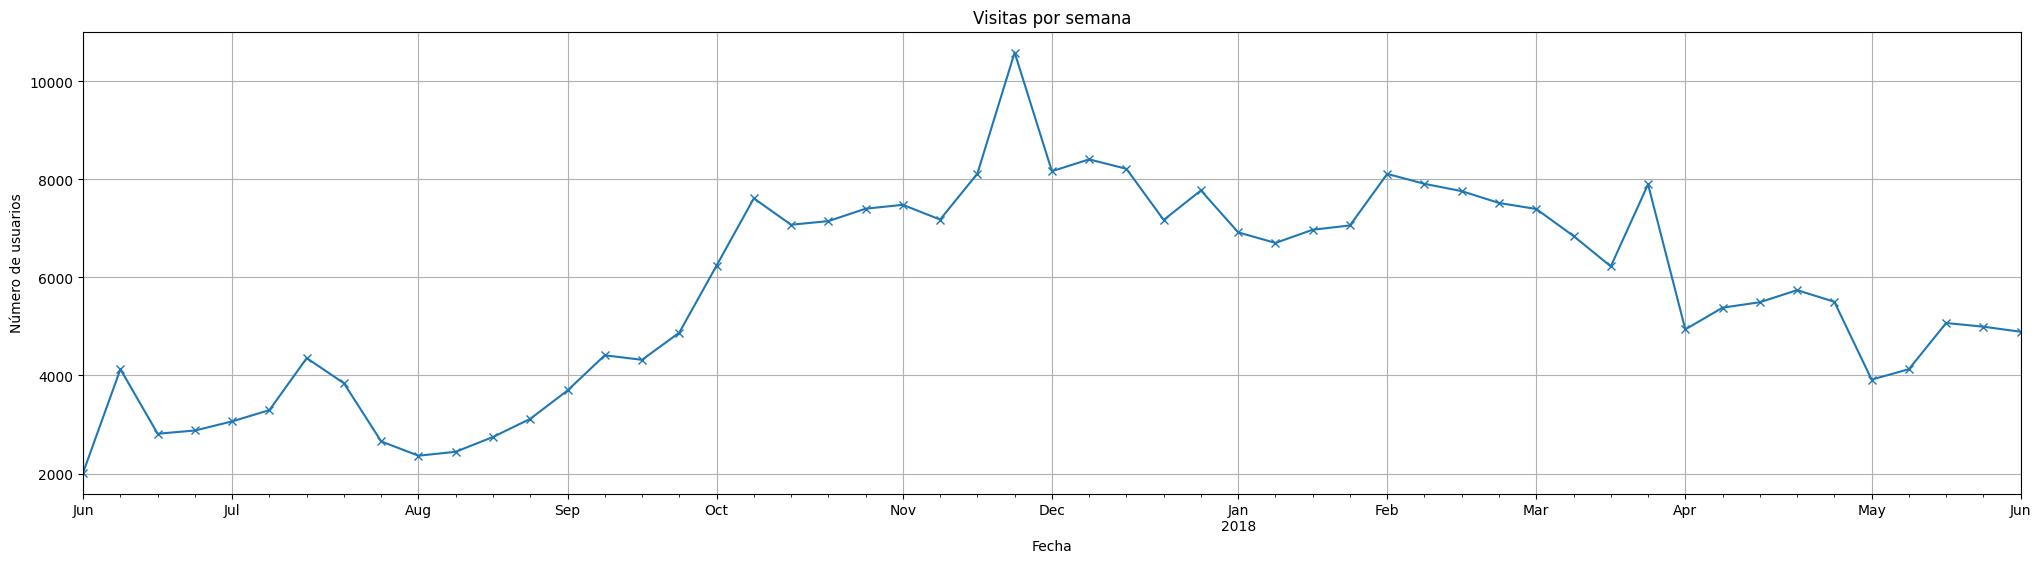

In [83]:
# Correción

# Comportamiento de visitas por semana


users_per_week.plot(marker = "x",
                  title = "Visitas por semana",
                  xlabel = "Fecha",
                  ylabel = "Número de usuarios",
                  legend = False,
                  grid = True,
                  figsize = [25,6])


plt.show()

El promedio de visitas semanales a la plataforma es de 5716 personas.
Por otro lado, las visitas semanales a lo largo del año, nos arroja que a inicios y finales del año es cuando mas se los usuarios visitan la plataforma.

##### ¿Cuántas personas lo usan cada mes?

In [84]:
# Cálculo del promedio semanal de visitas

df_visits['users_per_month'] = df_visits['start_ts'].dt.to_period('M')
users_per_month = df_visits.groupby("users_per_month").agg({"uid":"nunique"})
mau_total = users_per_month.mean()

print("La cantidad de usuarios promedio diarios es: ", round(mau_total.iloc[0]))

La cantidad de usuarios promedio diarios es:  23228


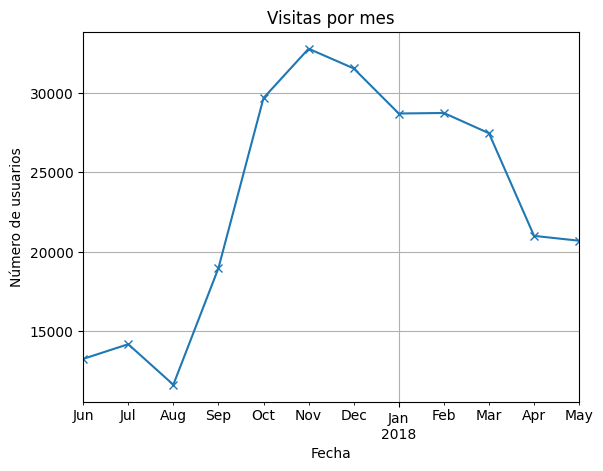

In [85]:
# Correción

# Comportamiento de visitas por semana


users_per_month.plot(marker = "x",
                  title = "Visitas por mes",
                  xlabel = "Fecha",
                  ylabel = "Número de usuarios",
                  legend = False,
                  grid = True,
                  )


plt.show()

El promedio de visitas mensuales a la plataforma es de 23228 personas.
Al igual que en la semanas, se observa que los primeros 3 meses y los últimos 3 meses del año son los que presentan mas visitas.

#### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).

In [86]:
# Cálculo del promedio diario de sesiones

sessions_per_day = df_visits.groupby("users_per_day").agg({"uid":("count","nunique")})
sessions_per_day.columns = ["n_sessions", "n_users"]
sessions_per_day["sessions_per_users"] = sessions_per_day["n_sessions"] / sessions_per_day["n_users"]
display(sessions_per_day.describe())


,n_sessions,n_users,sessions_per_users
count,364.000000,364.000000,364.000000
mean,987.357143,907.991758,1.082166
std,418.985399,370.513838,0.020873
min,1.000000,1.000000,1.000000
25%,635.500000,594.000000,1.070321
50%,1003.000000,921.000000,1.082488
75%,1280.000000,1173.000000,1.093876
max,4042.000000,3319.000000,1.217837


<AxesSubplot:title={'center':'Sesiones por día'}, xlabel='Fecha', ylabel='Número de sesiones'>

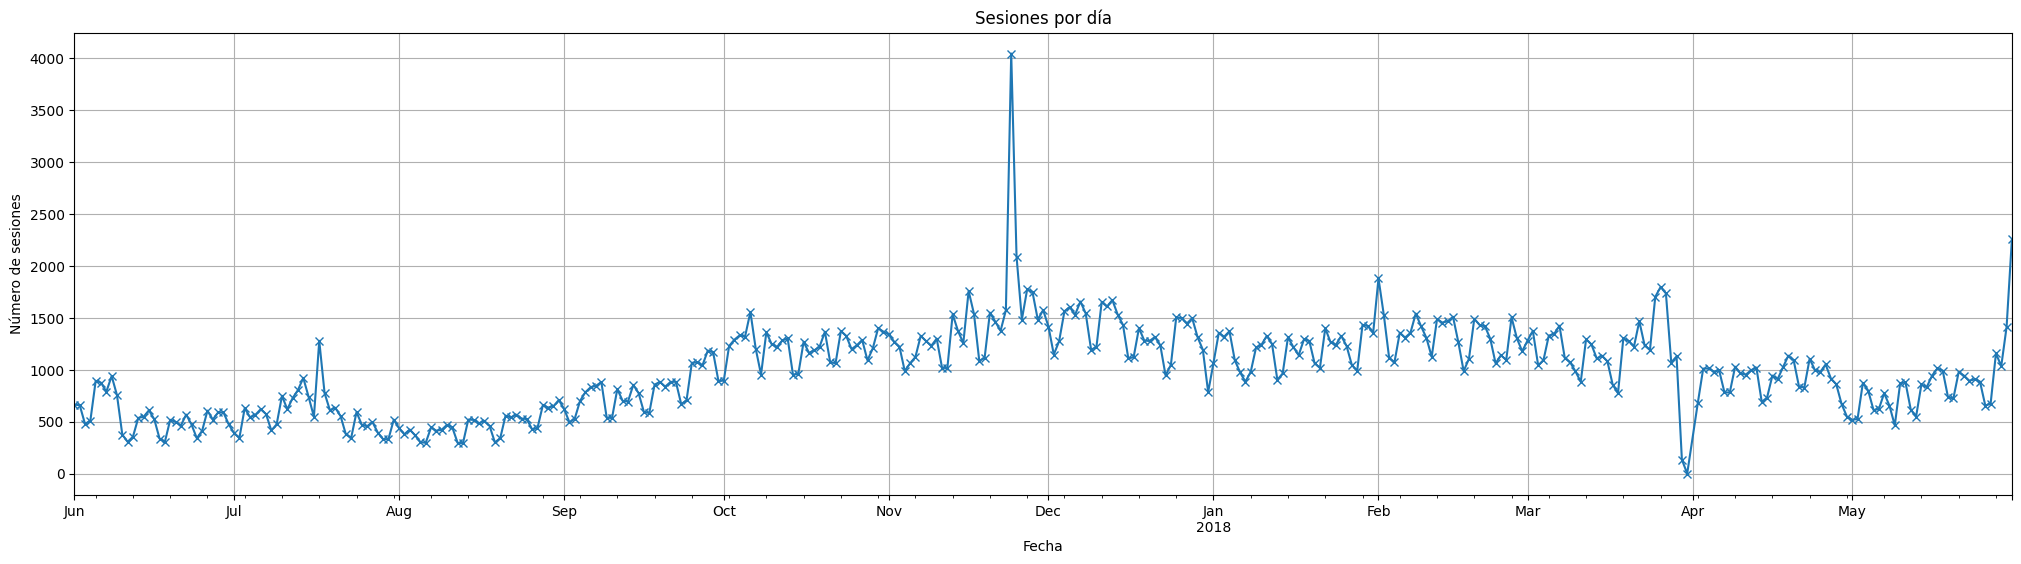

In [87]:
# Gráfico de sesiones por día

sessions_per_day["n_sessions"].plot(marker = "x",
                  title = "Sesiones por día",
                  xlabel = "Fecha",
                  ylabel = "Número de sesiones",
                  legend = False,
                  grid = True,
                  figsize = [25,6])

<AxesSubplot:title={'center':'Sesiones por día por usuario'}, xlabel='Fecha', ylabel='Número de sesiones'>

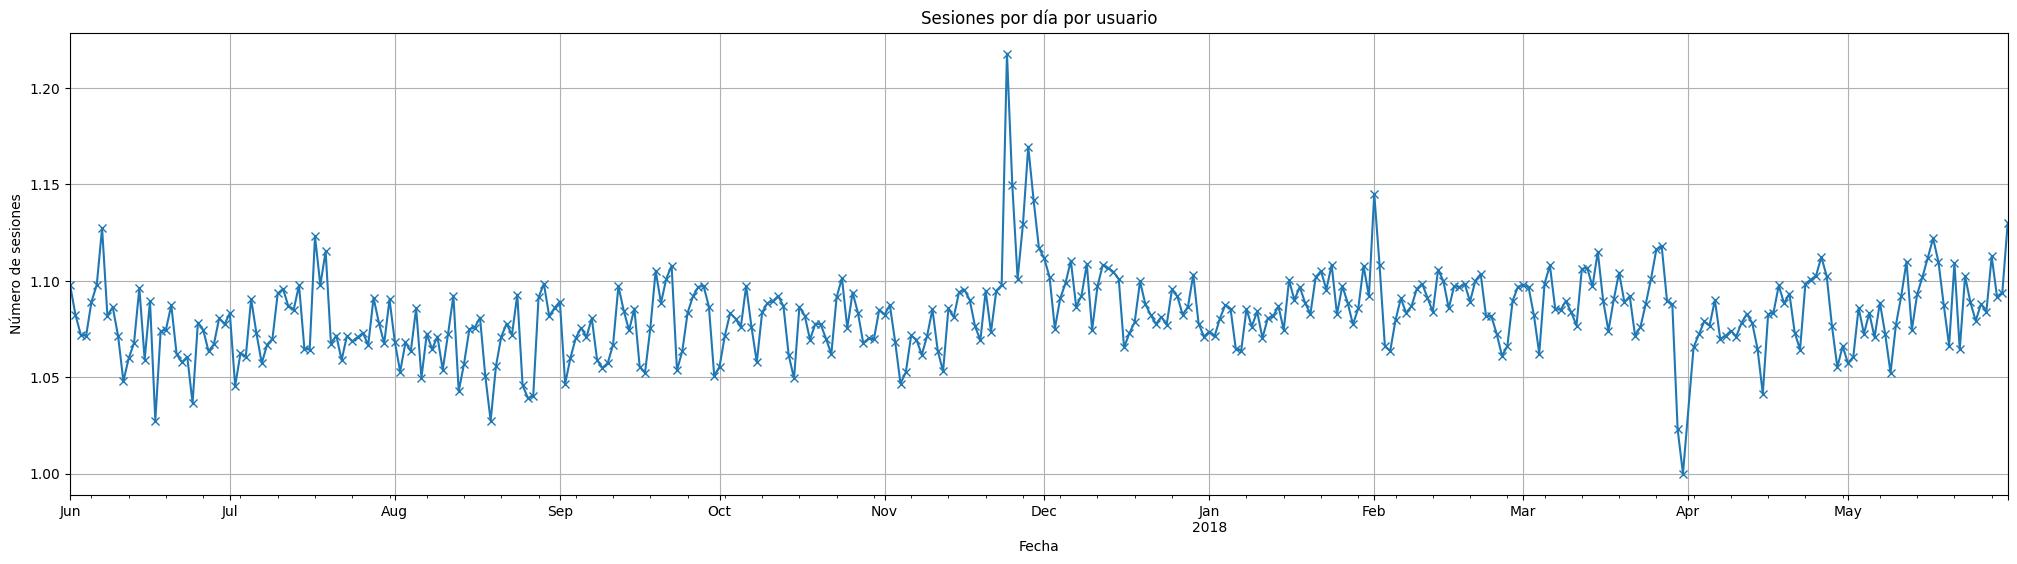

In [88]:
# Gráfico de sesiones por día por usuario

sessions_per_day["sessions_per_users"].plot(marker = "x",
                  title = "Sesiones por día por usuario",
                  xlabel = "Fecha",
                  ylabel = "Número de sesiones",
                  legend = False,
                  grid = True,
                  figsize = [25,6])

Al igual que las visitas, la mayor cantidad se sesiones se agrupa en los meses alrededor del fin de año, teniendo un promedio de 987 ssiones por día.

#### ¿Cuál es la duración de cada sesión?

In [89]:
# Creación de la columna con la diferencia de tiempos

df_visits["session_duration_min"] = (df_visits["end_ts"] - df_visits["start_ts"]) / np.timedelta64(1 ,"m")

Text(0, 0.5, 'Frecuencia')

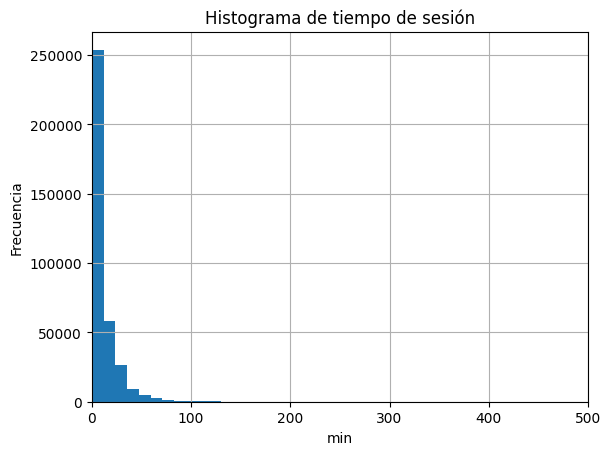

In [90]:
# Visualización de la columna de difrencia de tiempos, acortada a 200 min

df_visits["session_duration_min"].hist(bins = 60)
plt.xlim(0, 500)
plt.title('Histograma de tiempo de sesión')
plt.xlabel('min')
plt.ylabel('Frecuencia')

In [91]:
# Descripcipión del df

df_visits["session_duration_min"].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64

In [92]:
# Eliminación de sesiones con tiempo negativo

lower_than_0 = df_visits[df_visits["session_duration_min"] < 0]
df_visits.drop(lower_than_0.index, inplace =True)

In [93]:
# Descripción del df para asegurar que no hay valores menores a 0

df_visits["session_duration_min"].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64

In [94]:
# Cálculo del valor mas frecuente de tiempo por sesión

session_duration_mode = df_visits["session_duration_min"].mode()
print(f"El valor mas frecuente de sesión en la plataforma es de {int(session_duration_mode)} minutos")

El valor mas frecuente de sesión en la plataforma es de 1 minutos


In [95]:
# Sesiones con mas de 100 minutos

(df_visits["session_duration_min"] > 100).sum()

1565

El valor mas frecuente de sesión en la plataforma es de 1 minuto diarios, sin embargo, existen 1565 sesiones que duraron mas de 100 minutos

#### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [96]:
# Cálculo del sticky factor
sticky_wau = dau_total.iloc[0] / wau_total.iloc[0] * 100
sticky_mau = dau_total.iloc[0] / mau_total.iloc[0] * 100
print(f"El sticky factor dau/wau es de: {round(sticky_wau,2)} %")
print(f"El sticky factor dau/mau es de: {round(sticky_mau,2)} %")

El sticky factor dau/wau es de: 15.88 %
El sticky factor dau/mau es de: 3.91 %


Al ser el sticky factor del 15.88%, significa que el 15.88% de los usuarios vuelven a visitar la página semanalmente

### Ventas

#### ¿Cuándo la gente empieza a comprar?

(En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).

In [97]:
#Iniciaremos calculando la fecha del primer registro por usuario creando la variable first_activity_date:

register_date = df_visits.groupby("uid")["start_ts"].min()
register_date.name = "register_date"
register_date = register_date.reset_index()
register_date

,uid,register_date
0,10000171586432207426,2017-12-01 15:11:00
1,10000344846682484395,2018-02-21 16:01:00
2,1000036778515242839,2017-09-05 20:22:00
3,10000460875579931334,2017-09-13 09:12:00
4,10000558740593440652,2018-01-03 18:39:00
...,...,...
228164,9999530179466660745,2017-06-14 14:33:00
228165,9999704916412649026,2017-06-29 23:04:00
228166,9999829453910784044,2017-11-09 15:32:00
228167,9999912853550499774,2017-08-18 09:23:00


In [98]:
#Ahora crearemos una nueva variable que almacene la fecha de la primera compra por usuario:

first_order_date = df_orders.groupby("uid")["buy_ts"].min()
first_order_date.name = "first_order_date"
first_order_date = first_order_date.reset_index()
first_order_date

,uid,first_order_date
0,10000837700716403746,2017-06-21 16:12:00
1,10000997030965831953,2018-01-19 12:28:00
2,10001199569370567060,2017-11-25 17:29:00
3,10002243978166172255,2017-10-15 17:20:00
4,10003351403065971701,2017-11-20 13:18:00
...,...,...
36518,999745712858219747,2017-08-08 17:53:00
36519,9997777271989789335,2017-11-17 16:36:00
36520,999906621142257600,2018-01-26 22:16:00
36521,9999334409150825432,2017-12-06 13:28:00


In [99]:
first_activity = register_date.merge(first_order_date, on = "uid")
first_activity["delta_time_register_&_first_purchase"] = (first_activity["first_order_date"] - first_activity["register_date"]).dt.days
first_activity

,uid,register_date,first_order_date,delta_time_register_&_first_purchase
0,10000837700716403746,2017-06-08 10:12:00,2017-06-21 16:12:00,13
1,10000997030965831953,2018-01-19 11:16:00,2018-01-19 12:28:00,0
2,10001199569370567060,2017-11-25 17:26:00,2017-11-25 17:29:00,0
3,10002243978166172255,2017-10-15 17:18:00,2017-10-15 17:20:00,0
4,10003351403065971701,2017-11-20 13:17:00,2017-11-20 13:18:00,0
...,...,...,...,...
36518,999745712858219747,2017-08-08 15:12:00,2017-08-08 17:53:00,0
36519,9997777271989789335,2017-11-17 16:35:00,2017-11-17 16:36:00,0
36520,999906621142257600,2018-01-26 22:05:00,2018-01-26 22:16:00,0
36521,9999334409150825432,2017-12-06 13:26:00,2017-12-06 13:28:00,0


count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: delta_time_register_&_first_purchase, dtype: float64

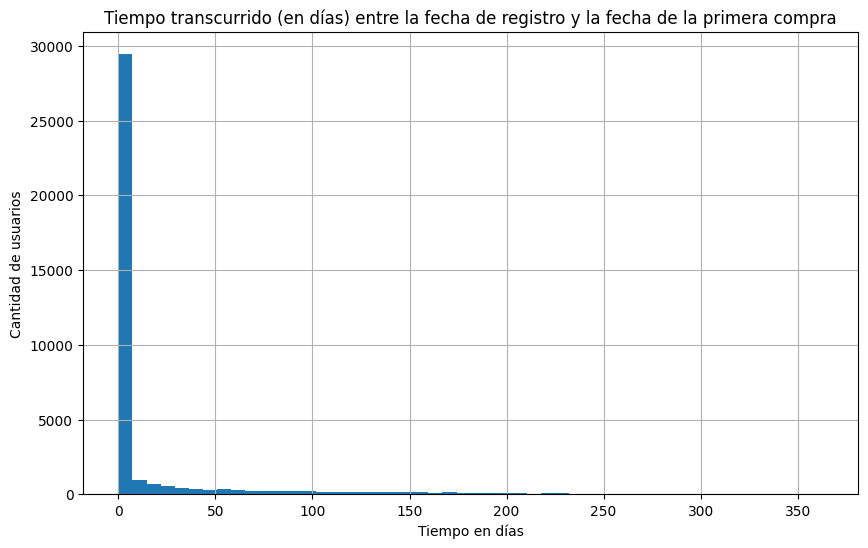

0      26363
1       1011
2        563
3        434
4        324
       ...  
312        1
309        1
341        1
325        1
337        1
Name: delta_time_register_&_first_purchase, Length: 345, dtype: int64

In [100]:
#Análisis y visualización del tiempo transcurrido entre el registro y la primera compra:

display(first_activity['delta_time_register_&_first_purchase'].describe())

plt.figure(figsize=(10,6))
first_activity['delta_time_register_&_first_purchase'].hist(bins=50)
plt.xlabel('Tiempo en días')
plt.ylabel('Cantidad de usuarios')
plt.title('Tiempo transcurrido (en días) entre la fecha de registro y la fecha de la primera compra')
plt.show()


display(first_activity['delta_time_register_&_first_purchase'].value_counts())

In [101]:
#Cálculo del porcentaje de usuarios que compraron el mismo día que se registraron:

first_activity_day_0 = 100 * len(first_activity[first_activity['delta_time_register_&_first_purchase'] == 0]) / len(first_activity['delta_time_register_&_first_purchase'])

print('El porcentaje de usuarios que realizaron la primera compra el mismo día de haberse registrado es de :', round(first_activity_day_0, 2),'%')

El porcentaje de usuarios que realizaron la primera compra el mismo día de haberse registrado es de : 72.18 %


Se decide dejar los cohortes en días y no pasar a semanas, dado que la gráfica nos muestra que la mayoría hace su compra en el día 0, es decir el mismo día que se registró. A partir de día 2, los usuarios son relativamente bajos.

El 72.18% de los usuarios compra en el día 0. 

#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [103]:
# Creación de columnas divididas mes

df_orders["order_month"] = df_orders["buy_ts"].dt.to_period("M")

In [104]:
# agrupación de compras por mes

orders_per_month = df_orders.groupby("order_month").agg({"uid":"count"}).reset_index()
orders_per_month.columns = ["date", "quantity_orders_per_month"]
orders_per_month

,date,quantity_orders_per_month
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


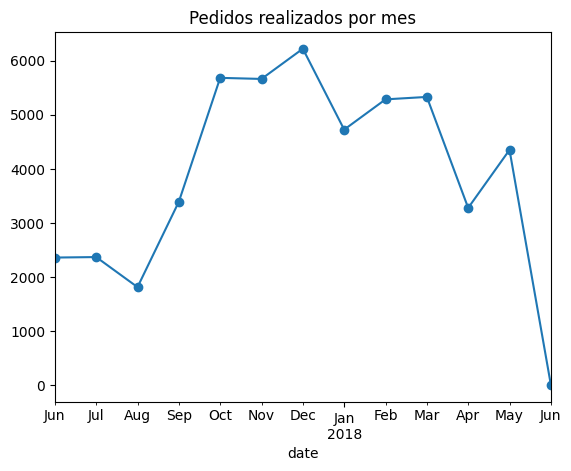

In [105]:
orders_per_month.plot(kind='line',
                      marker= 'o', 
                      x='date',
                      y='quantity_orders_per_month',
                      title='Pedidos realizados por mes',
                      legend=False)

plt.show()

In [106]:
avg_quantity_orders_per_month = orders_per_month["quantity_orders_per_month"].mean()
print("El promedio de compras mensual es de: " ,round(avg_quantity_orders_per_month))

El promedio de compras mensual es de:  3878


Se realizó un análisi de periodo mensuaul en donde se tiene un promedio de 3878 .

Es importante resaltar que el mayor número de pedidos se tiene de octubre a marzo, siendo diciembre el mes con mayor pedidos.

#### ¿Cuál es el tamaño promedio de compra?

In [107]:
# Agrupación por usuario y suma de los ingresos

total_revenue_user = df_orders.groupby("uid").agg({"revenue":"sum"}).reset_index()
total_revenue_user

,uid,revenue
0,10000837700716403746,2.20
1,10000997030965831953,1.83
2,10001199569370567060,1.00
3,10002243978166172255,17.41
4,10003351403065971701,6.72
...,...,...
36518,999745712858219747,0.73
36519,9997777271989789335,11.61
36520,999906621142257600,0.98
36521,9999334409150825432,0.98


In [108]:
# Descripición de ingresos por usuario

total_revenue_user["revenue"].describe()

count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: revenue, dtype: float64

Se tiene una desviación muy alta y hay mucha diferencia entre el promedio y el valor mas alto, por lo que se sacará la mediana y se harán visualizaciones de los datos

In [109]:
# Cálculo de la mediana

total_revenue_user["revenue"].median()

3.05

Text(0.5, 1.0, 'Diagrama de caja y bigotes: Ingresos totales por usuario')

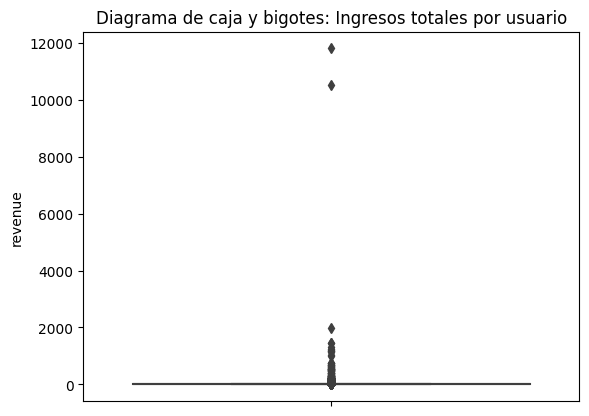

In [110]:
# Visulización de los datos en diagrama de caja

sns.boxplot(y="revenue", data = total_revenue_user)
plt.title("Diagrama de caja y bigotes: Ingresos totales por usuario")

Text(0.5, 1.0, 'Diagrama de caja y bigotes: Ingresos totales por usuario')

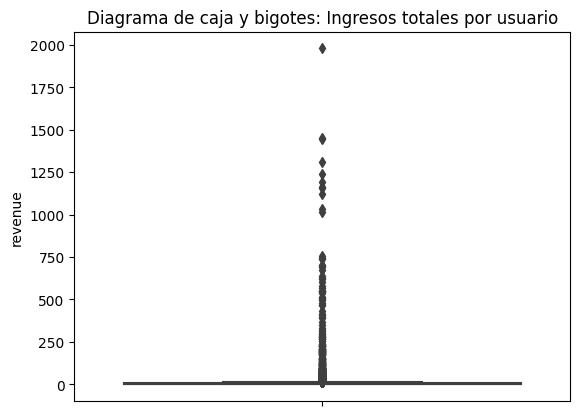

In [111]:
# filtro de datos menores a 4000 ingresos y visulización de los datos en diagrama de caja 

total_revenue_user_filtered =total_revenue_user[total_revenue_user["revenue"] < 4000]
sns.boxplot(y="revenue", data = total_revenue_user_filtered)
plt.title("Diagrama de caja y bigotes: Ingresos totales por usuario")

Text(0, 0.5, 'Número de usuarios')

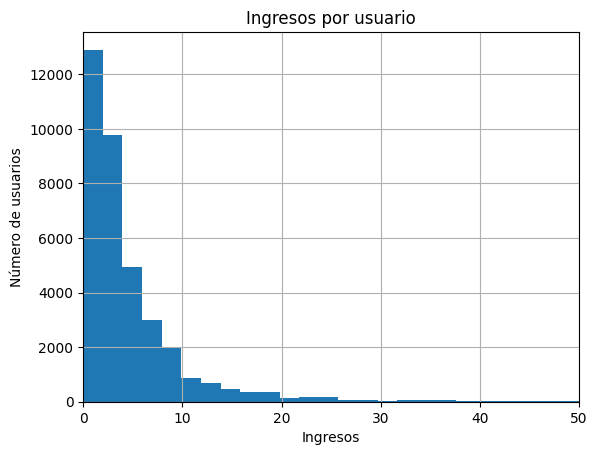

In [112]:
# Visualización en histograma.El histograma se limita de 0 a 50 dolares

total_revenue_user_filtered.hist(bins = 1000)

plt.xlim(0, 50)
plt.title('Ingresos por usuario')
plt.xlabel('Ingresos')
plt.ylabel('Número de usuarios')


Dado que aún existen muchos valore atípicos, se realizará un nuevo filtro solo contabilizando los ingresos menores a 15 dls

Text(0.5, 1.0, 'Diagrama de caja y bigotes: Ingresos totales por usuario')

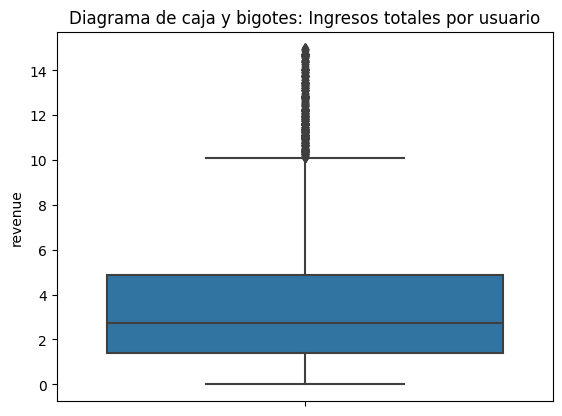

In [113]:
# filtro de datos menores a 15 ingresos y visualización de los datos en diagrama de caja 

total_revenue_user_filtered_1 =total_revenue_user[total_revenue_user["revenue"] < 15]
sns.boxplot(y="revenue", data = total_revenue_user_filtered_1)
plt.title("Diagrama de caja y bigotes: Ingresos totales por usuario")


(0.0, 15.0)

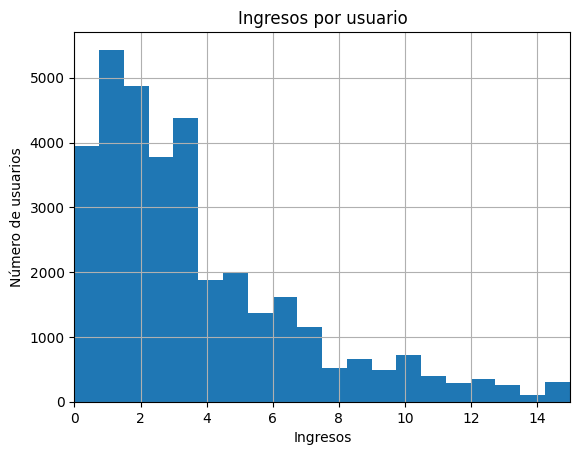

In [114]:
# Visualización en histograma.El histograma se limita de 0 a 15 dolares

total_revenue_user_filtered_1.hist(bins = 20)
plt.title('Ingresos por usuario')
plt.xlabel('Ingresos')
plt.ylabel('Número de usuarios')
plt.xlim(0, 15)

In [115]:
# Usuarios que tienen ingresos en 0

total_revenue_user[total_revenue_user["revenue"]== 0]

,uid,revenue
585,10281425020415612933,0.0
3254,1149062814762747892,0.0
10778,14872085179275033073,0.0
10993,14973814017160376581,0.0
11622,15254206642996645755,0.0
18569,184148767273119549,0.0
18697,1879819502567241225,0.0
20332,2636645662067512510,0.0
20881,2883839899480223178,0.0
20996,2936104404423239931,0.0


In [116]:
# Cálculo del promedio de ingresos con los datos de interés

total_revenue_user_filtered_1["revenue"].mean()
print("El promedio ingresos por usuario es de ",round(total_revenue_user_filtered_1["revenue"].mean(),1))

El promedio ingresos por usuario es de  3.7


Dado que hay una variación muy grande en los datos, se optó por filtrar los datos que se encuentrem con ingresos menores a15 dolares, dado que en este rango es donde se concentra la mayor cantidad de datos. **Obteniendo un valor promedio de 3.7 dolares por usuario.**
Existen valores con ingresos de 0, sin embargo representan una cantidad insignificante y pueden ser regalos que se dieron por parte de la aplicación

#### ¿Cuánto dinero traen? (LTV)

In [117]:
#Inicialmente del DataFrame df_orders utilizaremos su columna orders_month y de ahí crearemos un nuevo dataframe que agrupe uid a través del valor mínimo del mes:

first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

,uid,first_order_month
0,10000837700716403746,2017-06
1,10000997030965831953,2018-01
2,10001199569370567060,2017-11
3,10002243978166172255,2017-10
4,10003351403065971701,2017-11


In [118]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:
#Procederemos a crear y calcular el tamaño de las cohortes:

cohort_sizes = first_orders.groupby('first_order_month')['uid'].count().reset_index()
cohort_sizes.columns = ["first_order_month", "n_buyers"]
cohort_sizes

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


In [119]:
#Ahora crearemos un nuevo DataFrame que una df_orders con first_orders con el fin de obtener los meses de compra y la fecha inicial de compra por uid.


df_orders_merged = df_orders.merge(first_orders, on = 'uid')
df_orders_merged

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05,2018-05


In [120]:
#Aprovechando df_orders_merged agruparemos el mes de la primera compra y el mes de la compra para obtener la sumatoria de revenue y así totalizar los ingresos:

cohorts = df_orders_merged.groupby(['first_order_month','order_month']).agg({'revenue':'sum'}).reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06,2017-06,9557.49
1,2017-06,2017-07,981.82
2,2017-06,2017-08,885.34
3,2017-06,2017-09,1931.30
4,2017-06,2017-10,2068.58
...,...,...,...
74,2018-03,2018-05,1114.87
75,2018-04,2018-04,10600.69
76,2018-04,2018-05,1209.92
77,2018-05,2018-05,13925.76


In [121]:
#Finalmente crearemos un nuevo dataframe que almacene las cohortes y las relacione con la tabla dimensional cohort_sizes:

df_cohort_report = cohort_sizes.merge(cohorts, on='first_order_month')
df_cohort_report

,first_order_month,n_buyers,order_month,revenue
0,2017-06,2023,2017-06,9557.49
1,2017-06,2023,2017-07,981.82
2,2017-06,2023,2017-08,885.34
3,2017-06,2023,2017-09,1931.30
4,2017-06,2023,2017-10,2068.58
...,...,...,...,...
74,2018-03,3533,2018-05,1114.87
75,2018-04,2276,2018-04,10600.69
76,2018-04,2276,2018-05,1209.92
77,2018-05,2988,2018-05,13925.76


In [122]:
#Se procede a crear la edad de las cohortes restando order_month con first_order_month:

df_cohort_report['age'] = ((df_cohort_report["order_month"].dt.to_timestamp() - df_cohort_report["first_order_month"].dt.to_timestamp()).dt.days/30).round().astype(int)
df_cohort_report



,first_order_month,n_buyers,order_month,revenue,age
0,2017-06,2023,2017-06,9557.49,0
1,2017-06,2023,2017-07,981.82,1
2,2017-06,2023,2017-08,885.34,2
3,2017-06,2023,2017-09,1931.30,3
4,2017-06,2023,2017-10,2068.58,4
...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,2
75,2018-04,2276,2018-04,10600.69,0
76,2018-04,2276,2018-05,1209.92,1
77,2018-05,2988,2018-05,13925.76,0


In [123]:
#Finalmente creamos una columna adicional que almacene el LTV

df_cohort_report['ltv'] = df_cohort_report['revenue'] / df_cohort_report['n_buyers']
df_cohort_report

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06,2023,2017-06,9557.49,0,4.724414
1,2017-06,2023,2017-07,981.82,1,0.485329
2,2017-06,2023,2017-08,885.34,2,0.437637
3,2017-06,2023,2017-09,1931.30,3,0.954671
4,2017-06,2023,2017-10,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,2,0.315559
75,2018-04,2276,2018-04,10600.69,0,4.657597
76,2018-04,2276,2018-05,1209.92,1,0.531599
77,2018-05,2988,2018-05,13925.76,0,4.660562


In [124]:
# CÓDIGO REVISOR
# Cálculo del ltv por cohorte y edad 

df_cohort_report["ltv"] = df_cohort_report["revenue"] / df_cohort_report["n_buyers"]


# Tabla pivota para mostrar el LTV promedio
output2 = df_cohort_report.pivot_table(
    index = "first_order_month",
    columns = "age",
    values = "ltv",
    aggfunc = "mean"
).cumsum(axis=1).round(2)

output2.fillna("")

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


In [125]:
#En este caso crearemos una tabla dinámica que muestre los ingresos acumulados a lo largo de tiempo para cada cohorte:

output = df_cohort_report.pivot_table(
index = 'first_order_month',
columns = 'age',
values = 'ltv',
aggfunc = 'mean').cumsum(axis=1).round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02,4.16,4.44,4.51,4.59,,,,,,,,


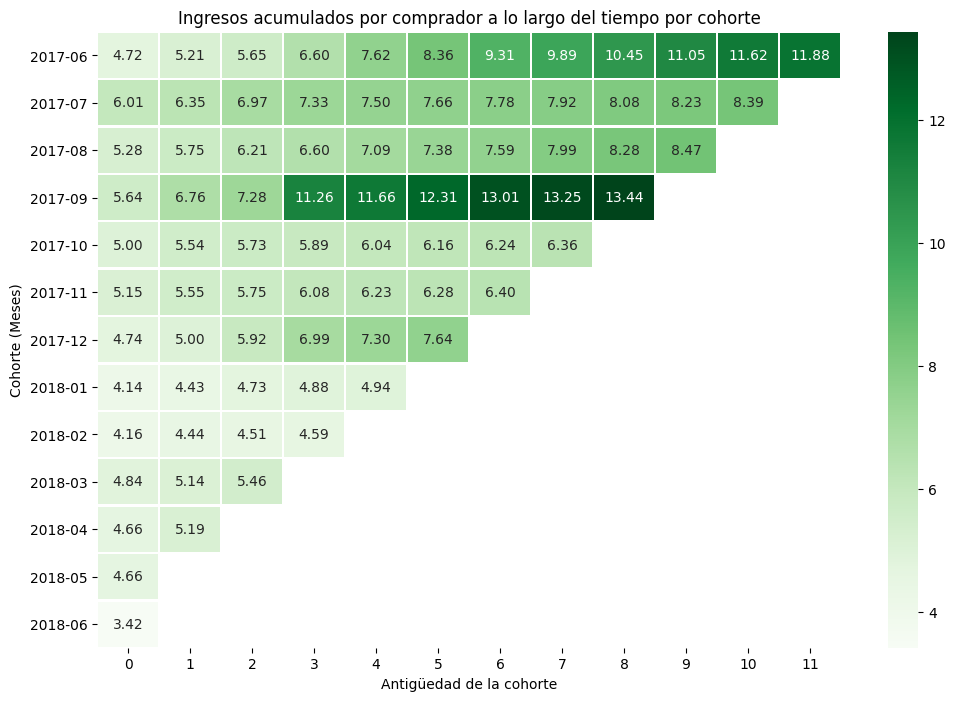

In [126]:
# Mapa de calor



plt.figure(figsize=(12,8))
sns.heatmap(output, annot=True, linewidths=1, cmap='Greens' , fmt=".2f")
plt.title('Ingresos acumulados por comprador a lo largo del tiempo por cohorte')
plt.xlabel('Antigüedad de la cohorte')
plt.ylabel('Cohorte (Meses)')
plt.show()

Del gráfico anterior podemos destacar que la cohorte '2017-09' da un salto de ingresos por usuario importante a partir del tercer mes de antiguedad (diciembre de 2017), siendo así la cohorte que más aportó ingresos por usuarios.

Corregido, muchas gracias!

### Marketing

#### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

##### ¿Cuánto dinero se gastó? Total

In [127]:
# Suma de los gastos totales

general_cost = df_costs["costs"].sum()
print("El costo total fue de: ", general_cost)

El costo total fue de:  329131.62


##### ¿Cuánto dinero se gastó? por fuente de adquisición

In [128]:
# Agrupación por "source_id" para obtención de la sumatoria de gastos

costs_per_source = df_costs.groupby("source_id")["costs"].sum().reset_index()
costs_per_source.sort_values(by="costs", ascending = False)


,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


**La fuente número 3 fue la que mas gastó con 141,321 dolares**, mientras que la fuente 9 fue la que menos gastó con 5,517 dolares

##### ¿Cuánto dinero se gastó? a lo largo del tiempo

In [129]:
# Obtención de los meses de cada gasto

df_costs["cost_month"] = df_costs["dt"].astype("datetime64[M]")
df_costs

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [130]:
# Suma de gastos por mes

monthly_costs= df_costs.groupby("cost_month")["costs"].sum()
monthly_costs

cost_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

Text(0, 0.5, 'Gastos')

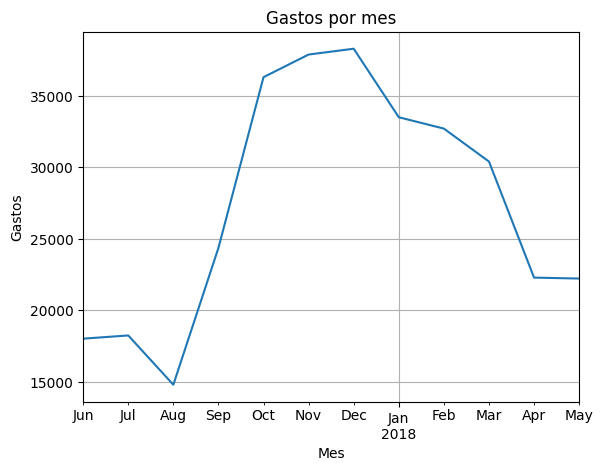

In [131]:
# Gráfica de línea de gastos por mes

monthly_costs.plot()
plt.grid(True)
plt.title('Gastos por mes')
plt.xlabel('Mes')
plt.ylabel('Gastos')


In [132]:
# Cálculo de la suma acumulada de gastos

tl=pd.DataFrame(monthly_costs)
tl=tl.reset_index()
tl["cumulative_sum"] = tl["costs"].cumsum()
tl

,cost_month,costs,cumulative_sum
0,2017-06-01,18015.00,18015.00
1,2017-07-01,18240.59,36255.59
2,2017-08-01,14790.54,51046.13
3,2017-09-01,24368.91,75415.04
4,2017-10-01,36322.88,111737.92
5,2017-11-01,37907.88,149645.80
6,2017-12-01,38315.35,187961.15
7,2018-01-01,33518.52,221479.67
8,2018-02-01,32723.03,254202.70
9,2018-03-01,30415.27,284617.97


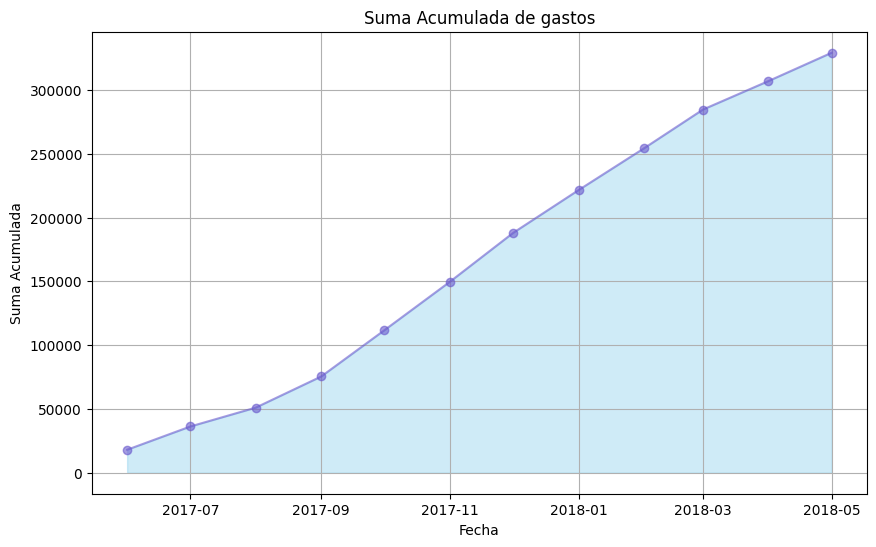

In [133]:
# Gráfico de suma acumulada de gastos

plt.figure(figsize=(10, 6))
plt.fill_between(tl['cost_month'], tl['cumulative_sum'], color='skyblue', alpha=0.4)
plt.plot(tl['cost_month'], tl['cumulative_sum'], marker='o', color='Slateblue', alpha=0.6)
plt.title('Suma Acumulada de gastos')
plt.xlabel('Fecha')
plt.ylabel('Suma Acumulada')
plt.grid(True)
plt.show()

La mayor canitdad de gastos se realizan entre septiembre y Marzo.

#### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [134]:
# Primer visita y fuente por usuario 

first_visit = df_visits.sort_values(by='start_ts').groupby('uid').first().reset_index()
first_visit                                                                 

,uid,device,end_ts,source_id,start_ts,users_per_day,users_per_week,users_per_month,session_duration_min
0,10000171586432207426,desktop,2017-12-01 15:15:00,3,2017-12-01 15:11:00,2017-12-01,2017-11-27/2017-12-03,2017-12,4.0
1,10000344846682484395,desktop,2018-02-21 16:36:00,3,2018-02-21 16:01:00,2018-02-21,2018-02-19/2018-02-25,2018-02,35.0
2,1000036778515242839,desktop,2017-09-05 20:47:00,3,2017-09-05 20:22:00,2017-09-05,2017-09-04/2017-09-10,2017-09,25.0
3,10000460875579931334,touch,2017-09-13 09:23:00,4,2017-09-13 09:12:00,2017-09-13,2017-09-11/2017-09-17,2017-09,11.0
4,10000558740593440652,desktop,2018-01-03 19:00:00,4,2018-01-03 18:39:00,2018-01-03,2018-01-01/2018-01-07,2018-01,21.0
...,...,...,...,...,...,...,...,...,...
228164,9999530179466660745,desktop,2017-06-14 14:49:00,3,2017-06-14 14:33:00,2017-06-14,2017-06-12/2017-06-18,2017-06,16.0
228165,9999704916412649026,touch,2017-06-29 23:19:00,4,2017-06-29 23:04:00,2017-06-29,2017-06-26/2017-07-02,2017-06,15.0
228166,9999829453910784044,desktop,2017-11-09 15:33:00,3,2017-11-09 15:32:00,2017-11-09,2017-11-06/2017-11-12,2017-11,1.0
228167,9999912853550499774,touch,2017-08-18 09:35:00,4,2017-08-18 09:23:00,2017-08-18,2017-08-14/2017-08-20,2017-08,12.0


In [135]:
# Usuarios que se conviertieron en clientes

registered_buyers = first_visit[first_visit["uid"].isin(df_orders["uid"].unique())]
registered_buyers

,uid,device,end_ts,source_id,start_ts,users_per_day,users_per_week,users_per_month,session_duration_min
6,10000837700716403746,desktop,2017-06-08 10:20:00,4,2017-06-08 10:12:00,2017-06-08,2017-06-05/2017-06-11,2017-06,8.0
9,10000997030965831953,desktop,2018-01-19 12:48:00,4,2018-01-19 11:16:00,2018-01-19,2018-01-15/2018-01-21,2018-01,92.0
18,10001199569370567060,touch,2017-11-25 17:36:00,4,2017-11-25 17:26:00,2017-11-25,2017-11-20/2017-11-26,2017-11,10.0
31,10002243978166172255,desktop,2017-10-15 18:09:00,4,2017-10-15 17:18:00,2017-10-15,2017-10-09/2017-10-15,2017-10,51.0
43,10003351403065971701,desktop,2017-11-20 13:19:00,4,2017-11-20 13:17:00,2017-11-20,2017-11-20/2017-11-26,2017-11,2.0
...,...,...,...,...,...,...,...,...,...
228122,999745712858219747,desktop,2017-08-08 15:28:00,3,2017-08-08 15:12:00,2017-08-08,2017-08-07/2017-08-13,2017-08,16.0
228130,9997777271989789335,desktop,2017-11-17 16:37:00,3,2017-11-17 16:35:00,2017-11-17,2017-11-13/2017-11-19,2017-11,2.0
228152,999906621142257600,desktop,2018-01-26 22:26:00,2,2018-01-26 22:05:00,2018-01-26,2018-01-22/2018-01-28,2018-01,21.0
228157,9999334409150825432,desktop,2017-12-06 13:37:00,3,2017-12-06 13:26:00,2017-12-06,2017-12-04/2017-12-10,2017-12,11.0


In [136]:
# Número de clientes por fuente por mes

clients_per_source = registered_buyers.groupby(["source_id","users_per_day"])["uid"].nunique().reset_index()
clients_per_source = clients_per_source.rename(columns={'uid':'number_of_unique_users'})
clients_per_source['users_per_day'] = clients_per_source['users_per_day'].dt.to_timestamp()

clients_per_source

,source_id,users_per_day,number_of_unique_users
0,1,2017-06-01,24
1,1,2017-06-02,12
2,1,2017-06-03,8
3,1,2017-06-04,6
4,1,2017-06-05,20
...,...,...,...
2395,10,2018-05-27,2
2396,10,2018-05-28,7
2397,10,2018-05-29,4
2398,10,2018-05-30,10


In [137]:
# Costos por fuente y por día

costs_per_source_date = df_costs.groupby(["source_id","dt"])["costs"].sum().reset_index()
costs_per_source_date

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [138]:
# unión de df, costs_per_source_date y clients_per_source

merged_source_costs = costs_per_source_date.merge(clients_per_source, left_on = ("source_id","dt"), right_on = ("source_id","users_per_day"))
merged_source_costs["dt_month"]= merged_source_costs["dt"].dt.to_period("M")

# Cálculo del CAC
merged_source_costs["cac"] = merged_source_costs["costs"] / merged_source_costs["number_of_unique_users"]
merged_source_costs

,source_id,dt,costs,users_per_day,number_of_unique_users,dt_month,cac
0,1,2017-06-01,75.20,2017-06-01,24,2017-06,3.133333
1,1,2017-06-02,62.25,2017-06-02,12,2017-06,5.187500
2,1,2017-06-03,36.53,2017-06-03,8,2017-06,4.566250
3,1,2017-06-04,55.00,2017-06-04,6,2017-06,9.166667
4,1,2017-06-05,57.08,2017-06-05,20,2017-06,2.854000
...,...,...,...,...,...,...,...
2394,10,2018-05-27,9.92,2018-05-27,2,2018-05,4.960000
2395,10,2018-05-28,21.26,2018-05-28,7,2018-05,3.037143
2396,10,2018-05-29,11.32,2018-05-29,4,2018-05,2.830000
2397,10,2018-05-30,33.15,2018-05-30,10,2018-05,3.315000


In [139]:
# Agrupación del CAC por mes

cac_per_source = merged_source_costs.groupby("source_id")["cac"].mean().sort_values( ascending = False).reset_index()
cac_per_source

,source_id,cac
0,2,17.002963
1,3,15.118899
2,1,9.118983
3,5,8.596789
4,9,7.152904
5,4,6.802483
6,10,6.553861


**Las fuentes con el CAC mas alto son la 2 y la 3, mientras que las restantes (a excepción de la 6 y 7) tienen CAC's muy parecidos.**

**Las fuentes 6 y 7 no tienen clientes ni costos.**

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Excelente! El cálculo es correcto

</div>

#### ¿Cuán rentables eran las inversiones? (ROMI)

ROMI para la fuente  3


,age,romi
0,0,0.336151
1,1,0.357750
2,2,0.367152
3,3,0.379767
4,4,0.394988
5,5,0.413851
6,6,0.423732
7,7,0.442706
8,8,0.454574
9,9,0.429613


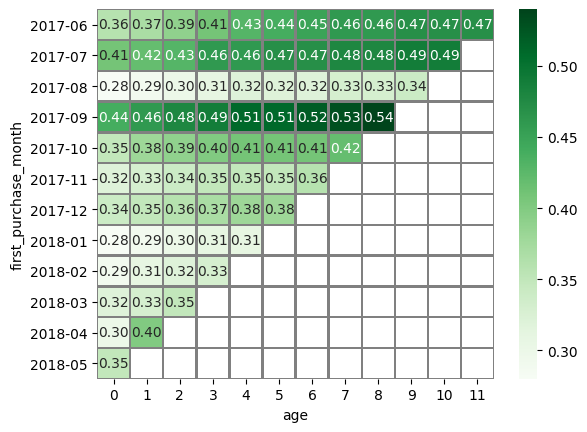

ROMI para la fuente  4


,age,romi
0,0,0.757409
1,1,0.776915
2,2,0.791630
3,3,0.814921
4,4,0.843845
5,5,0.900297
6,6,0.980375
7,7,0.900496
8,8,0.904477
9,9,0.952753


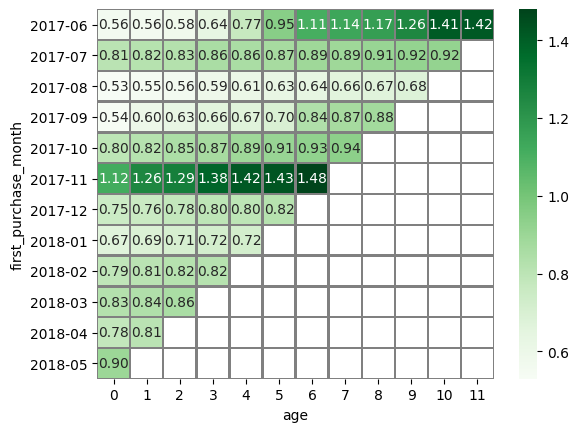

ROMI para la fuente  1


,age,romi
0,0,0.892768
1,1,1.048742
2,2,1.258675
3,3,1.363425
4,4,1.565990
5,5,1.768576
6,6,2.038114
7,7,2.362370
8,8,2.860597
9,9,3.462846


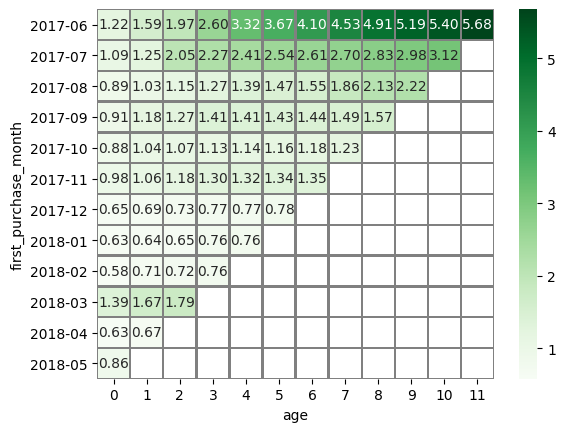

ROMI para la fuente  5


,age,romi
0,0,0.664923
1,1,0.718179
2,2,0.779610
3,3,1.111582
4,4,1.231647
5,5,1.387731
6,6,1.549131
7,7,1.783598
8,8,2.016601
9,9,1.415622


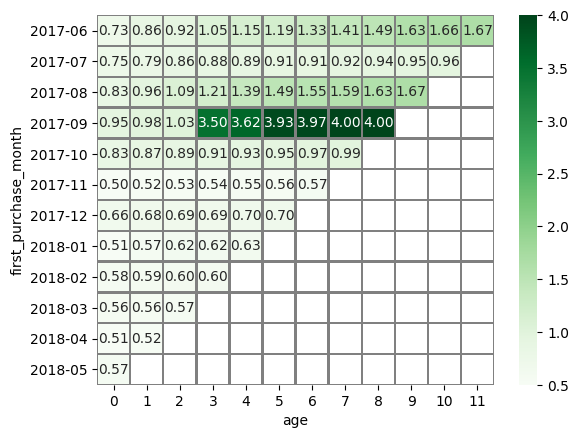

ROMI para la fuente  10


,age,romi
0,0,0.727377
1,1,0.708520
2,2,0.765743
3,3,0.685040
4,4,0.737312
5,5,0.754071
6,6,0.876620
7,7,0.773929
8,8,0.608024
9,9,0.899557


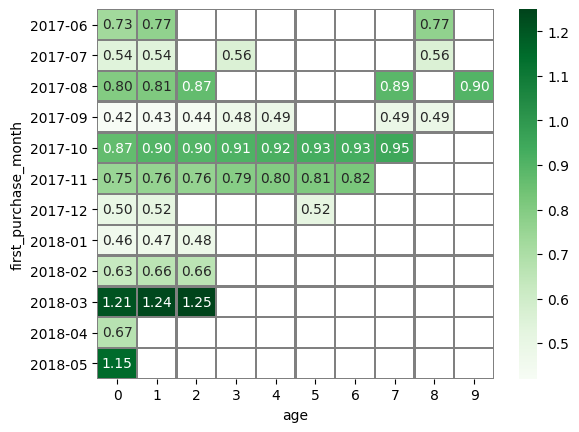

ROMI para la fuente  9


,age,romi
0,0,0.774013
1,1,0.847641
2,2,0.943664
3,3,1.041018
4,4,1.086613
5,5,1.216218
6,6,1.331051
7,7,1.455936
8,8,1.559885
9,9,1.428569


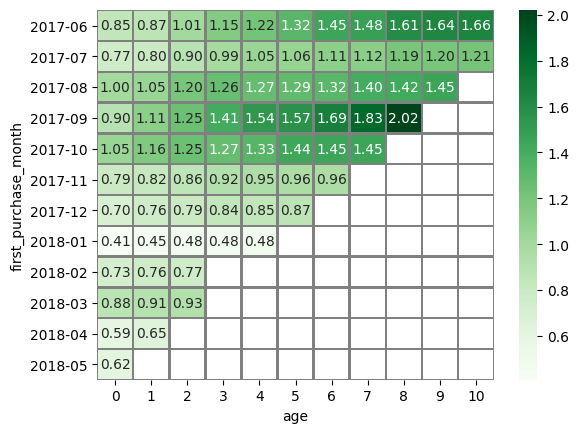

ROMI para la fuente  2


,age,romi
0,0,0.549286
1,1,0.630051
2,2,0.777428
3,3,0.939189
4,4,1.085749
5,5,1.229496
6,6,1.029998
7,7,1.140317
8,8,1.215401
9,9,0.994079


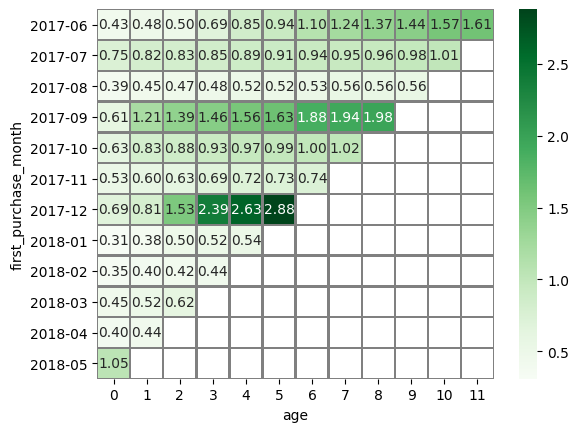

El DataFrame está vacío. No se puede generar un heatmap.
ROMI para la fuente  7


,age,romi


El DataFrame está vacío. No se puede generar un heatmap.
ROMI para la fuente  6


,age,romi


,Fuente,romi
2,1,2.380
3,5,1.303
5,9,1.192
6,2,1.041
1,4,0.934
4,10,0.754
0,3,0.413
7,7,NaN
8,6,NaN


In [145]:
# Ciclo For para iterar en cada una de las fuentes

total_romi_list=[]

for source_id in first_visit["source_id"].unique():
    source_users = first_visit[first_visit["source_id"]== source_id]
    source_orders = df_orders[df_orders["uid"].isin(source_users["uid"].unique())]
    
#     Primer mes de compra
    first_purchase_month = source_orders.groupby("uid")["order_month"].min().reset_index()
    first_purchase_month.columns = ['uid', 'first_purchase_month']
    
#     Unión de df
    merged_orders = source_orders.merge(first_purchase_month, on = "uid")
    
#     Cálculo de la edad del cohorte
    merged_orders["buy_ts"] = merged_orders["buy_ts"].dt.to_period("M")
    merged_orders["age"] = (merged_orders["buy_ts"] - merged_orders["first_purchase_month"]).apply(lambda x: x.n)
    
#     Tamaño del cohorte
    cohort_calculation_table = merged_orders.groupby("first_purchase_month").agg({"uid":"nunique"}).reset_index()
    cohort_calculation_table.columns = ['first_purchase_month', 'cohort_size']
    
#     Cáculo de LTV
    ltv_table = merged_orders.groupby(["first_purchase_month","age"])["revenue"].sum().reset_index()
    ltv_merged_table = ltv_table.merge(cohort_calculation_table, on = "first_purchase_month", how ="left")
    ltv_merged_table["ltv"] = ltv_merged_table["revenue"] / ltv_merged_table["cohort_size"]
    
#     Tabla pivota del LTV
    ltv_table_pivot = ltv_merged_table.pivot_table(
    index= "first_purchase_month",
    columns = "age",
    values = "ltv",
    aggfunc = "mean").cumsum(axis=1).round(2)
    
#     Costos mensuales
    costs_per_source = df_costs[df_costs["source_id"] == source_id]
    month_costs = costs_per_source.groupby("cost_month").agg({"costs":"sum"}).reset_index()
    month_costs["cost_month"] = month_costs["cost_month"].dt.to_period("M")
    
      
#     cac_per_source = merged_source_costs[merged_source_costs["source_id"] == source_id]
#     cac_per_source_month = cac_per_source.groupby("dt_month")["cac"].mean().reset_index()
    
#     Unión de df
    cac_ltv = ltv_merged_table.merge(month_costs, left_on = "first_purchase_month", right_on= "cost_month")
    
    
#     Cálculo de cac

    cac_ltv["cac"] = cac_ltv["costs"] / cac_ltv["cohort_size"]
#     Cálculo de ROMI
    cac_ltv["romi"] = cac_ltv["ltv"] / cac_ltv["cac"]
    
#     Tabla pivota del LTV
    romi_table_pivot = cac_ltv.pivot_table(
    index= "first_purchase_month",
    columns = "age",
    values = "romi",
    aggfunc = "mean")
    romi_table_pivot_=romi_table_pivot.cumsum(axis=1).round(2)
    romi_table_pivot_.fillna("")

#     Mapa de calor
    if romi_table_pivot_.empty:
        print("El DataFrame está vacío. No se puede generar un heatmap.")
    else:
        heat_map= sns.heatmap(romi_table_pivot_, 
                annot=True, 
                fmt='.2f', 
                linewidths=1, 
                cmap='Greens', 
                linecolor='grey')
    
    total_romi = romi_table_pivot.cumsum(axis=1).mean(axis=0).reset_index()
    total_romi.columns = ["age","romi"]
    print("ROMI para la fuente ", source_id)
    display(total_romi)
    plt.show()
    total_romi_list.append({"Fuente": source_id, "romi": round(total_romi["romi"].mean(),3)} )

romi_df = pd.DataFrame(total_romi_list)
display(romi_df.sort_values(by = "romi", ascending = False ))

El ROMI se refiere a que tan rentable es un negocio, cuando romi supera el 1 o 100% el negocio comienza a ser rentable, se observa que las fuentes 1 a 4 ya recuperaron su inversión, mientras que las tiendas 4, 10 y 3 aún no cubren los gastos de inversión.

### Conclusiones

**Conclusiones epecíficas por punto**

Algunos data frames tenían datos que podían ser establecidos desde la exportación de los datos, en donde se cambiaron los necesarios a tipo “category” y “datetime”

df_visits:
-	Se cambiaron los nombres de columna a minúscula y snake_case
-	No hay valores nulos
-	No existen valores duplicados
-	Los datos van desde el 01/06/2017 al 01/06/2018
-	El 24/11/2017 aparentemente es el día con mayor frecuecia de visitas
-	El source_id 4, aparentemente es el mas usado
-	Aparentemente por "desktop" es el dispositivo por el cual se visita mas la aplicación

df_orders:
- No hay valores nulos
- 	No existen valores duplicados
- 	El promedio de compras es de 5 con una alta desviación estandar, teniendo un mínimo de 0 y un máximo de 2633.

df_costs:
- 	No hay valores nulos
- 	No existen valores duplicados
- 	El promedio de costo es de 129 con una alta desviación estandar, teniendo un mínimo de 0.54 y un máximo de 1,788

a) Diariamente la plataforma es visitada cerca de 900 veces, mientras que la plataforma recibe aproximadamente 6,000 y 23,000 visitas semanal y mensualmente, respectivamente.

b) El tiempo de la visita por visita es de aproximadamente 1 minuto, sin embargo hay una gran cantidad de usuarios con valores atípicos, por lo que habría que revisar si existe algún problema en algún proceso de la aplicación.

c) Es importante saber que solo el 15.9% de los usuarios regresa a la aplicación semanalmente, por lo que es importante realizar alguna acción para poder retener a los clientes nuevos de la tienda.

d) Cerca del 72% de los usuario realizan su compra el mismo día que se registran, por lo que es muy probable que estos clientes entren a la plataforma ya decididos en que comprar, se puede colocar promociones en el menú de inicio para que realicen mas de una compra y regresen a la tienda.

e) La cantidad de pedidos  mensual oscila entre 1,000 y 6,000 pedidos. Entre Octubre y Marzo se encuentra el mayor número de pedidos, lo cual puede estar relacionad con las fechas de inicio y final de mes.

f) Cada usuario realiza un promedio compra de 3.7 dólares. Sin embargo, existen valores atípicos que superan por mucho el valor medio,  teniendo un máximo de 11,810 dolares. En este punto, para tener un valor mas aproximado al real, se optó por tomar la mediana como un valor representativo. Para tomar la decisión final, se decidió obtener el promedio de solo las compras que sean menores a 15 dolares.

g) El LTV nos muestra que los cohortes de clientes 2017-09 y 2017-06, son los que tienen un mayor LTV, mientras que el cohorte 2018-02 tiene el pero LTV, habrá que encontrar con que condiciones o promociones entraron cada uno de los clientes.

h) En total, se ha gastado un total de 329,131 dólares.
La fuente 3 fue la que mas gastos tuvo con 141,321 dólares, mas del doble de la 2da fuente con mas gastos, mientras que las fuentes 10 y 9 son las que menos hicieron gastos.
Los gastos generales van tienen un incremento de gastos entre Septiembre y Diciembre, mientras que de Enero en adelante los gastos van disminuyendo.

i) EL CAC nos muestra que efectivamente las fuentes 2 y 3 están teniendo un alto gasto para atraer a los clientes, mientras que las fuentes 4 y 10 tienen CAC muy bajos durante todo el año.

j) El ROMI por cohorte mensual nos muestra que mes a mes la empresa comienza a ser mas rentable, la mayor cantidad de las fuentes está logrando su retorno de inversión

**Conlusiones generales**

Es importante identificar porque el 70% de los usuarios solo realizan una compra y ya no regresan, para poder aumentar el ROMI de la empresa es importante aumentar el sticky factor, considero mas importante retener a los usuarios que intentar atraer nuevos clientes que solo realicen un pedido.

Definitivamente la fuente 3 es la que peores resultados obtuvo: Fue la que más gastos generó  y fue de las que menor rendimiento (LTV) tuvo:

Se destaca el comportamiento de la fuente 1 que en comparativa con el resto, no es de la que más gastos genera  y obtuvo muy buenos ingresos en sus primeras cohortes, con un crecimiento sostenido a través del tiempo.

La cohorte '2017-09' obtuvo un gran desempeño en al menos 3 fuentes y fue la que mayores ingresos generó. Sin duda alguna, es el grupo modelo a seguir y estudiar para obtener mejores rendimientos en ingresos vs costos.